<a href="https://colab.research.google.com/github/shaina-12/Artificial-Intelligence/blob/main/Machine%20Learning/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

In [33]:
data.data.shape

(20640, 8)

In [34]:
f = data.data
t = data.target.reshape(20640,1)
d = np.hstack((f,t))
house = pd.DataFrame(d,columns=data.feature_names+['Price'])
house.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [35]:
house = house.drop(['Latitude','Longitude'],axis=1)
house.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422


In [36]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Price       20640 non-null  float64
dtypes: float64(7)
memory usage: 1.1 MB


In [37]:
house.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Price         0
dtype: int64

In [38]:
house.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Price         0
dtype: int64

In [39]:
house.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,5.000010


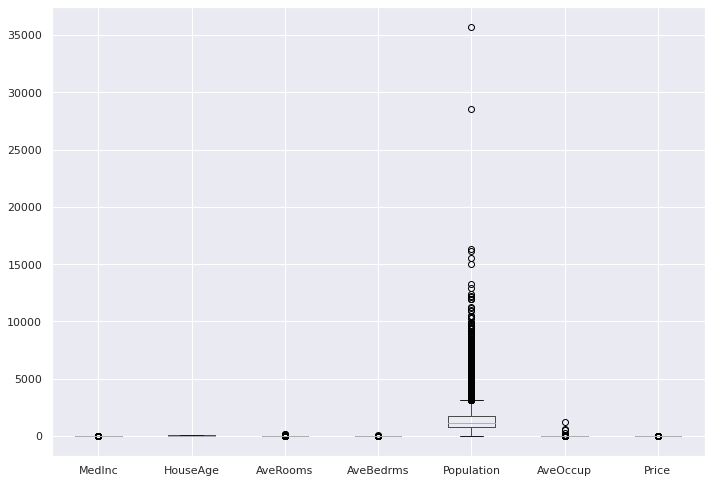

In [62]:
house.boxplot()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


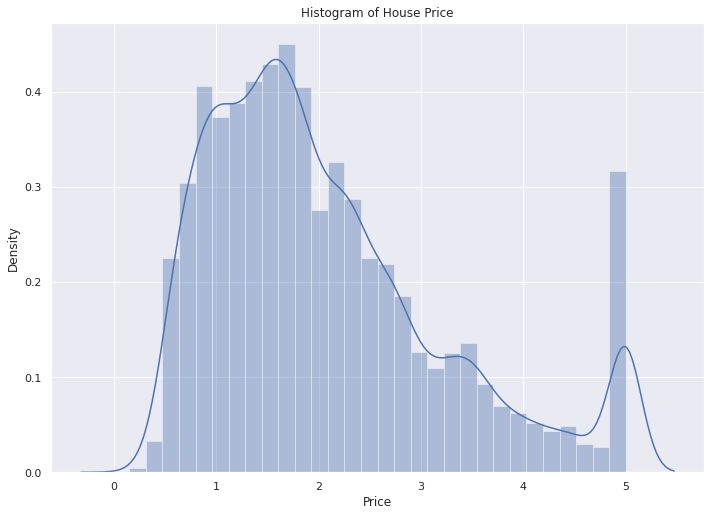

In [63]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(house['Price'],bins=30)
plt.title('Histogram of House Price')
plt.show()

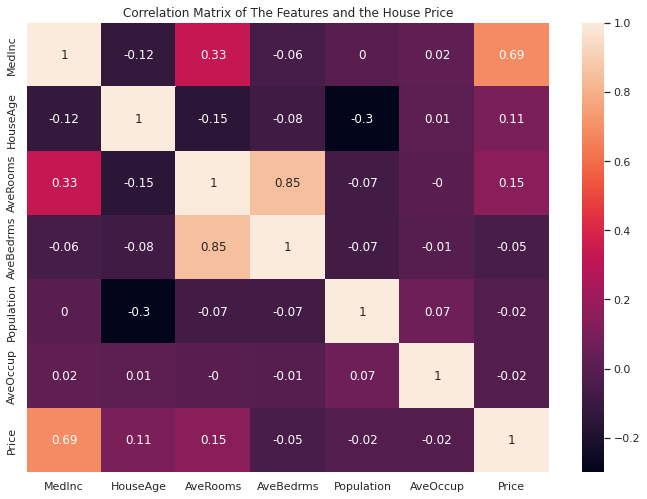

In [64]:
correlation_matrix = house.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True) #cmap='Blues_r'
plt.title('Correlation Matrix of The Features and the House Price')
plt.show()

In [65]:
features = house.iloc[:,0:6].values
target = house.iloc[:,6:7].values

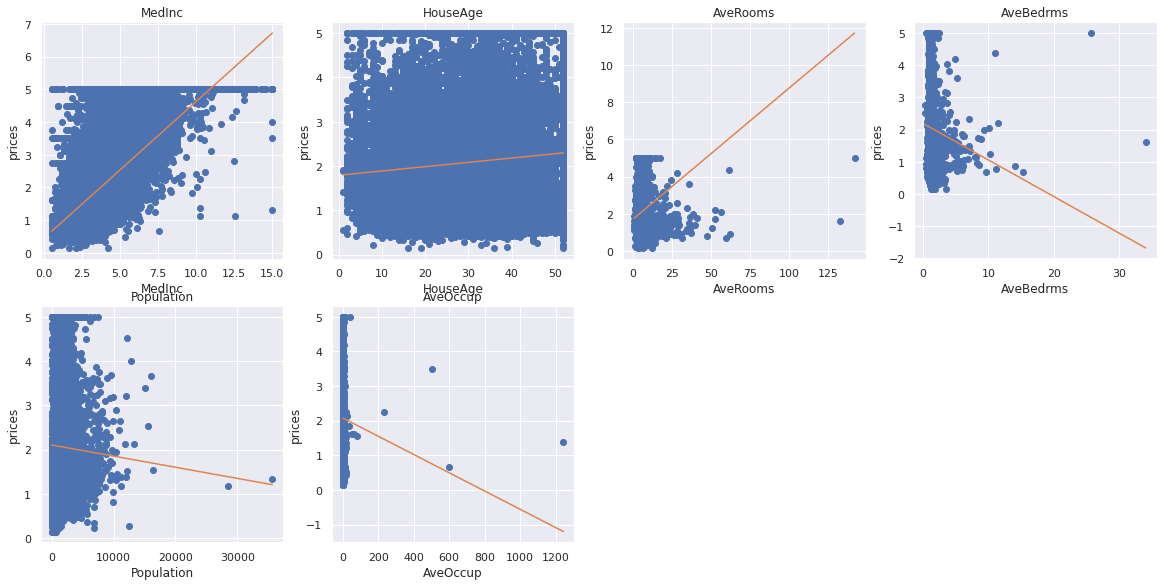

In [66]:
plt.figure(figsize=(20,20))
for i, col in enumerate(house.columns[0:6]):
  plt.subplot(4,4,i+1)
  x = house[col]
  y = house['Price']
  plt.plot(x,y,'o')
  plt.plot(np.unique(x),np.poly1d(np.polyfit(x,y,1))(np.unique(x)))
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel('prices')
plt.show()

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.2,random_state=0)

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
lin_model = make_pipeline(PolynomialFeatures(degree=2),LinearRegression())
lin_model.fit(x_train,y_train)
train_acc = lin_model.score(x_train,y_train)
test_acc = lin_model.score(x_test,y_test)
print('Train Accuracy:',train_acc)
print('Test Accuracy',test_acc)

Train Accuracy: 0.6084360355987386
Test Accuracy -4.933626378806732


In [84]:
from sklearn.linear_model import Lasso
lin_model = make_pipeline(PolynomialFeatures(degree=2),Lasso(alpha=100))
lin_model.fit(x_train,y_train)
train_acc = lin_model.score(x_train,y_train)
test_acc = lin_model.score(x_test,y_test)
print('Train Accuracy:',train_acc)
print('Test Accuracy',test_acc)

Train Accuracy: 0.3104359973287919
Test Accuracy 0.25566140750895616


In [85]:
from sklearn.linear_model import Ridge
lin_model = make_pipeline(PolynomialFeatures(degree=2),Ridge(alpha=50,max_iter=10))
lin_model.fit(x_train,y_train)
train_acc = lin_model.score(x_train,y_train)
test_acc = lin_model.score(x_test,y_test)
print('Train Accuracy:',train_acc)
print('Test Accuracy',test_acc)

Train Accuracy: 0.608034101053264
Test Accuracy -5.031369126443159


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.51133e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
